In [33]:
from sklearn.cluster import KMeans
import pandas as pd
from scipy.cluster.vq import kmeans
from scipy.spatial.distance import cdist,pdist
from sklearn.decomposition import RandomizedPCA
import numpy as np
import scipy.stats as stats


df = pd.read_pickle('../data/relationship_features_forclustering.pandas_df')


df = df["response_time","message_count","message_count_reciprocity","compound"]
df.dropna(inplace = True)

In [44]:
pca = RandomizedPCA(n_components=15).fit(df) # pca is an instance of class randomizedPCA with data['data']

X = pca.transform(df) # reduces data from (1797,64) to (1797,2) though not sure how.

print(stats.describe(X))
print X.shape

print pca.explained_variance_
print pca.explained_variance_ratio_
print pca.explained_variance_ratio_.cumsum()

DescribeResult(nobs=1254, minmax=(array([-1.1379362 , -1.69037593, -0.66603262, -1.33255484, -1.06543066,
       -1.10115557, -0.80915068, -0.85549893, -0.54135358, -0.72865457,
       -0.45018459, -0.50015927, -0.53535224, -0.682416  , -0.88407911]), array([ 2.1648325 ,  2.21107941,  3.55521808,  1.56753041,  1.38766218,
        1.16188624,  0.89616937,  0.99614871,  1.63280333,  0.82572433,
        1.28411141,  1.01697589,  1.07615238,  0.8488152 ,  1.03853175])), mean=array([ -7.07833579e-17,  -6.03805505e-17,  -1.15094891e-17,
         3.47498036e-17,  -7.07390906e-17,  -1.46081977e-17,
        -2.35501854e-17,  -3.17174959e-17,   9.07478948e-18,
        -8.64982372e-17,  -2.12040203e-17,  -1.23007665e-17,
        -2.22885683e-17,  -4.04160136e-17,   1.71646323e-17]), variance=array([ 0.34247434,  0.18876708,  0.14629989,  0.11354094,  0.07750999,
        0.07524813,  0.05953615,  0.05716901,  0.0554819 ,  0.04920482,
        0.03825002,  0.02922585,  0.028548  ,  0.01697543,  0.01

Populating the interactive namespace from numpy and matplotlib


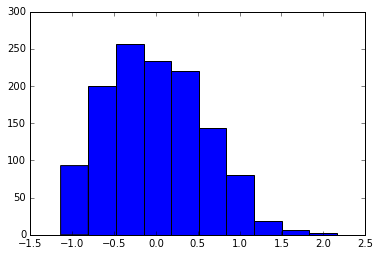

In [35]:
%pylab inline
plt.hist(X[:,0])

#plt.scatter(X[:,0], X[:,1])
plt.show()

Populating the interactive namespace from numpy and matplotlib


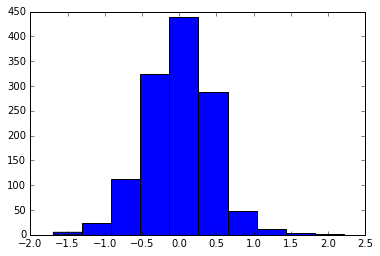

In [36]:
%pylab inline
plt.hist(X[:,1])
plt.show()

[[ 1.08610297  1.1808355 ]
 [ 1.27498595  1.11956842]
 [ 0.92863434  1.0860997 ]
 ..., 
 [ 0.26384124  1.02854002]
 [ 0.43908216  0.78771389]
 [ 0.36699088  0.95410197]]


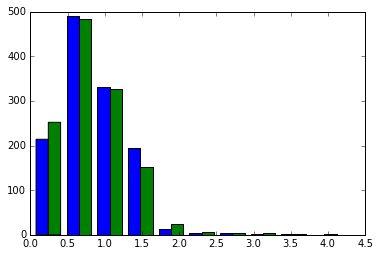

In [37]:
pred = []
k_means = kmeans(X,2)

centroids = k_means[0]
variance = k_means[1]

D_k = [cdist(X, centroids, 'euclidean')] # use code book to calulate distances for each point

print(D_k[0 ])

plt.hist(D_k[0])
plt.show()

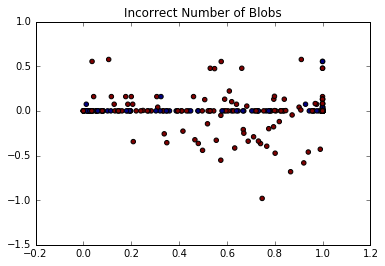

In [65]:
pred = []
k_means = KMeans(n_clusters = 2, init='k-means++')
pred = k_means.fit_predict(X)

plt.scatter(df["response_time_reciprocity"],df["response_time"] , c=pred)
plt.title("")